### Task 2
#### Problem statement

I have put a CSV file in an assignment folder in the **PFDA-courseware** repository.

Create a Jupyter notebook called `assignment2-weather.ipynb` that includes a well-designed plot of the temperature over time (`dryBulbTemperature_Celsius`).

#### Marks will be given for:
- Completing the assignment
- The visual quality of the plot

You may use **Pandas** if you wish to read in the data.


#### Introduction

We'll start by importing pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


We'll then read 'weatherreadings1.csv' into a datafame. We'll print the first few rows of the .csv to check that it's reading in OK.

In [2]:
## Let's start by reading 'weatherreadings1.csv' into a DF
data = pd.read_csv('weatherreadings1.csv')

## Let's print the first few rows of the .csv to check it's reading in OK
print(data.head())


                                 siteId        reportStartDateTime  \
0  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:15:00+00:00   
1  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T16:45:00+00:00   
2  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:00:00+00:00   
3  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:15:00+00:00   
4  f2d42aea-f516-ec11-b76a-0003ff599499  2024-10-02T17:30:00+00:00   

           reportEndDateTime  collectionName  isPublic  isLatestVersion  \
0  2024-10-02T16:15:00+00:00               1      True             True   
1  2024-10-02T16:45:00+00:00               1      True             True   
2  2024-10-02T17:00:00+00:00               1      True             True   
3  2024-10-02T17:15:00+00:00               1      True             True   
4  2024-10-02T17:30:00+00:00               1      True             True   

   observationType softwareType  windDirection  relativeHumidity  ...  isDcnn  \
0                1  WeatherLink            322 

##### Dry versus wet bulb temperature

I have decided to investigate - wet bulb temperature in addition to dry bulb temperature. 

Dry bulb temperature refers to the ambient air temperature, commonly known as air temperature, and is measured by a thermometer that is affected by the moisture content in air (National Weather Service n.d). In contrast, the wet bulb temperature represents the lowest temperature that air can cool to when water evaporates into it. It is measured using a thermometer with its bulb wrapped in wet muslin and exposed to airflow. The evaporation of water from the wet muslin cools the thermometer, resulting in a wet bulb temperature that is always lower than or equal to the dry bulb temperature. These temperatures are identical only at 100% relative humidity, when the air is fully saturated.  

We now use pyplot to plot time against both temperatures. 

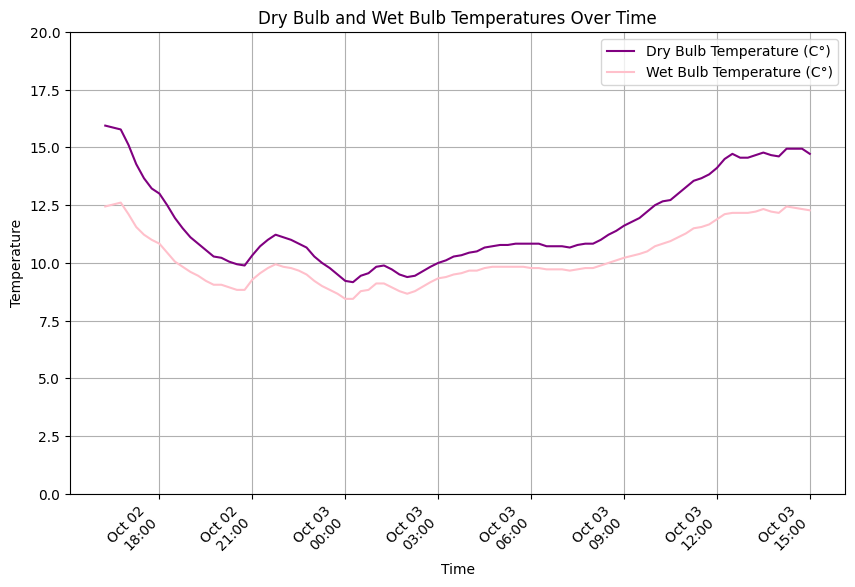

In [68]:
## Let's see what a plot that is 10" X 6" is like

plt.figure(figsize=(10, 6))

## We now use pyplot to plot time against temperature and define the legend.
## Added wet bulb
 
plt.plot (data['reportEndDateTime'], data['dryBulbTemperature_Celsius'], label='Dry Bulb Temperature (C°)', color='purple')
plt.plot (data['reportEndDateTime'], data['wetBulbTemperature_Celsius'], label='Wet Bulb Temperature (C°)', color='pink' )

## Label the axes and add a title and a legend
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title('Dry Bulb and Wet Bulb Temperatures Over Time')
plt.grid(True)
plt.legend()

# the x axis was croded initially - needed date formatting to prevent crowding
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n%H:%M'))
plt.xticks(rotation=45, ha='right')

## Y-axis limits seem to default to the exact range of temps in the .csv. I like round numbers so let's change that to a range of 0 to 20 degrees Celsius
plt.ylim(0, 20)
plt.show()


##### Analysis
From a visual inspection, it's evident that wet and dry bulb temperature are strongly related. We can use pandas to figure out the [correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) between the two:

In [3]:

# Calculate correlation and print the result
correlation = data['wetBulbTemperature_Celsius'].corr(data['dryBulbTemperature_Celsius'])
print(f"The correlation between wet-bulb and dry-bulb temperatures is: {correlation:.3f}")


Correlation between wet-bulb and dry-bulb temperatures: 0.991


A correlation of .991 indicates a very strong positive correlation. As the dry-bulb temperature increases, the wet-bulb temperature increases (National Weather Service n.d.). However, the wet-bulb temperature typically lags slightly behind due to its dependency on relative humidity. We can invstigate this relationship further by creating a scatterplot:

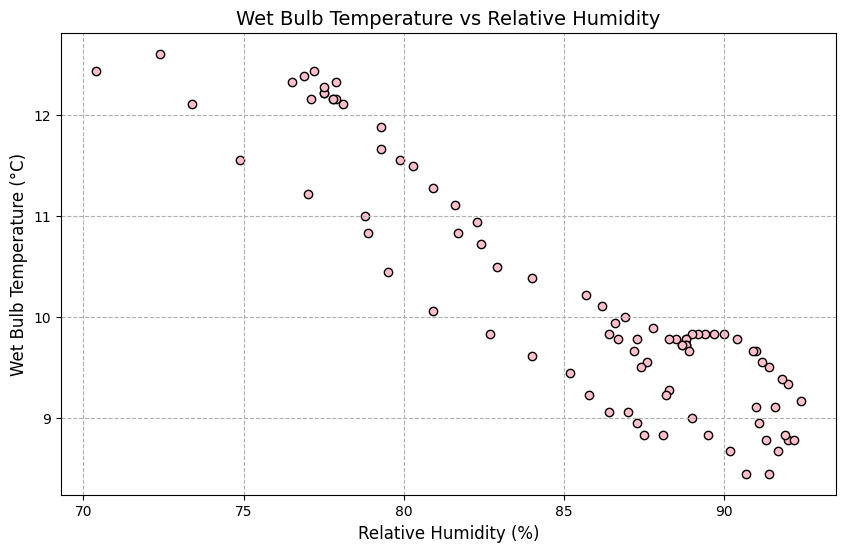

In [9]:

# Plotting Wet Bulb Temperature vs Relative Humidity
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.figure(figsize=(10, 6))
plt.scatter(data['relativeHumidity'], data['wetBulbTemperature_Celsius'], color='pink', edgecolor='black')
plt.title('Wet Bulb Temperature vs Relative Humidity', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('Wet Bulb Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()



##### Latitude and longitude
There is a single latitude and longitude noted in the .csv. It would be nice to have some code to tell us where tha data was collected. We need to install the [geopy](https://geopy.readthedocs.io/en/stable/) module to do this. Let's use the [Nominatim](https://gis.stackexchange.com/questions/293615/user-agent-argument-in-nominatim-in-geopy) geolocation service to do this.

In [67]:
from geopy.geocoders import Nominatim

## Adapted from https://gis.stackexchange.com/questions/293615/user-agent-argument-in-nominatim-in-geopy
geolocator = Nominatim(user_agent="miriamsgeoapi")

## We know that the latitude and longitude values are in the first row of the DF so let's extract them

latitude = data['latitude'].iloc[0]
longitude = data['longitude'].iloc[0]

## Use geopy's reverse method to get the location name - from https://geopy.readthedocs.io/en/stable/
location = geolocator.reverse((latitude, longitude), exactly_one=True)

print(f"The bad weather we were observing was in....: {location.address}") 




The bad weather we were observing was in....: 62, Blackacre, Tuam, Tuam Municipal District, County Galway, Connacht, H54 V260, Éire / Ireland


#### References

1. [GeoPy Documentation](https://geopy.readthedocs.io/en/stable/)

2. [Stack Exchange: User-Agent Argument in Nominatim in GeoPy](https://gis.stackexchange.com/questions/293615/user-agent-argument-in-nominatim-in-geopy)

3. [Pandas Documentation: `DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

4. [National Weather Service: Dry Bulb and Wet Bulb Temperatures](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html#:~:text=The%20wet%20bulb%20temperature%20is%20always%20lower%20than%20the%20dry,state%20of%20the%20humid%20air)
